# Workflow for modeling

Using outputs from data_sprint_anna. Duplicating the same logic for folder names etc.

In [1]:
%load_ext autoreload
%autoreload 2
import os, sys
import scipy.special
import numpy as np
import pandas as pd

In [5]:
sampling = 1 # 0 for random sampling, 1 for Static Sparce Grid
num_samples = 15 # if using SSG, it will find the level to get at least this amount of samples

#set the bounds, order t_eped, n_eped, d_n_ped (=d_T_ped), n_esep
bounds = [[1.0, 1.8], [3.0, 4.4], [0.05, 0.1], [0.5, 2.8]]
x0_grid = [0.94,0.95,0.96,0.97,0.98,0.99]
#set output directory (can be empty or non-empty for analysis)
if sampling == 0:
    base_run_dir = '/scratch/project_462000451/daniel/sprint_out/helena/full_test'
else:
    base_run_dir = '/scratch/project_462000451/daniel/sprint_out/helena/19_2_SSG'

In [3]:

run_folder_name = '-'.join([str(b) for b in np.array(bounds).flatten()])
hel_output_names = []
if os.path.exists(os.path.join(base_run_dir, run_folder_name)):
    hel_output_names = [name for name in os.listdir(os.path.join(base_run_dir, run_folder_name)) 
                    if os.path.isdir(os.path.join(base_run_dir, run_folder_name, name))]
    print("The following HELENA output directories were found in the folder")
    print(hel_output_names)
else:
    print(os.path.join(base_run_dir, run_folder_name))
    print("Given directory does not excist")

The following HELENA output directories were found in the folder
['1.4-3.7-0.07500000000000001-0.07500000000000001-0.5000000000000003', '1.4-4.4-0.07500000000000001-0.07500000000000001-1.65', '1.8-3.7-0.07500000000000001-0.07500000000000001-2.8', '1.8-3.7-0.07500000000000001-0.07500000000000001-1.65', '1.4-3.7-0.07500000000000001-0.07500000000000001-2.8', '1.4-3.7-0.1-0.1-2.8', '1.4-3.7-0.1-0.1-1.65', '1.8-4.4-0.07500000000000001-0.07500000000000001-1.65', '1.4-3.7-0.05000000000000001-0.05000000000000001-1.65', '1.4-3.7-0.07500000000000001-0.07500000000000001-1.65', '1.4-4.4-0.1-0.1-1.65', '1.0-3.7-0.07500000000000001-0.07500000000000001-1.65', '1.4-4.4-0.07500000000000001-0.07500000000000001-2.8', '1.4-3.0-0.07500000000000001-0.07500000000000001-1.65', '1.8-3.7-0.1-0.1-1.65']


In [4]:
sys.path.append('/project/project_462000451/enchanted-surrogates_11feb2025/submodules')
sys.path.append('/project/project_462000451/enchanted-surrogates_11feb2025/submodules/IFS_scripts')
sys.path.append('/project/project_462000451/enchanted-surrogates_11feb2025/src')
from parsers.GENEparser import GENEparser
gp = GENEparser()
scanfiles_dir = '/scratch/project_462000451/gene_out/gene_auto_97781/jet_97781_ion-scale_90/ex-jet_97781_ion-scale_90_batch-0/scanfiles0000/'
print(sys.path)
x = gp.get_model_inputs(scanfiles_dir, suffix='0001')
y = gp.get_model_outputs(scanfiles_dir, suffix='0001')

print('x',x)
print('y',y)


Cannot find DREAM. Please add the $DREAMPATH/py to your PYTHONPATH environment variable before running. No module named 'DREAM'
['/opt/cray/pe/python/3.11.7/lib/python311.zip', '/opt/cray/pe/python/3.11.7/lib/python3.11', '/opt/cray/pe/python/3.11.7/lib/python3.11/lib-dynload', '', '/scratch/project_462000451/daniel/daniel_sprint/lib/python3.11/site-packages', '/project/project_462000451/enchanted-surrogates_11feb2025/submodules', '/project/project_462000451/enchanted-surrogates_11feb2025/submodules/IFS_scripts', '/project/project_462000451/enchanted-surrogates_11feb2025/src']
ky =  0.048351505
x [ 3.57494130e+00  4.87839320e-01  4.87839320e-01  4.83515050e-02
  4.32779218e+00  2.39417495e+00  8.10000000e-01  2.26091065e-03
  1.76872368e-02  1.58952518e+00  1.36367522e+00  1.07569167e+00
  7.98689771e-01  5.73225305e-01  4.05307216e-01  2.95409431e-01
  2.36276507e-01  2.32767491e-01  3.03119475e-01  4.69908534e-01
  7.69185916e-01  1.20831272e+00  1.80906419e+00  2.56913871e+00
  3.63

# Get inputs and outputs from GENE runs

In [75]:
gene_base_dir = '/scratch/project_462000451/daniel/sprint_out/gene/19_2_SSG'

outputs_d = []
inputs_d = []
growthrates = []
kys = []
x0s = []
for name_path in hel_output_names:
    for x0 in x0_grid:
        scan_sufxs = gp.get_all_suffixes(os.path.join(gene_base_dir, run_folder_name, name_path, str(x0)))
        last_scan_sufx = scan_sufxs[-1]
        scan_file_path = os.path.join(gene_base_dir, run_folder_name, name_path, str(x0), "scanfiles"+last_scan_sufx)
        print(scan_file_path)
        gr_ky = gp.read_kymin_growthrate(os.path.join(scan_file_path, 'scan.log'))
        sufxs = gp.get_all_suffixes(scan_file_path)
        if len(sufxs) < 4:
            continue
        else:
            growthrates.append(gr_ky["growthrate"])
            print('kys', gr_ky["ky"])
            kys.append(gr_ky["ky"])
            x0s.append([x0]*len(gr_ky["ky"]))
            #problemd = os.path.join('/project/project_462000451/gene/', name_path)
            
            #print(sufxs)
            for sufx in sufxs:
                #print(sufx)
                try:
                    out = gp.get_model_outputs(scan_file_path, sufx)
                    inp = gp.get_model_inputs(scan_file_path, sufx)
                    
                    if len(sufxs) > 4:
                        outputs_d.append(out)
                        inputs_d.append(inp)

                        
                except:
                    print("Run unsuccessfull for", name_path)
                    break

/scratch/project_462000451/daniel/sprint_out/gene/19_2_SSG/1.0-1.8-3.0-4.4-0.05-0.1-0.5-2.8/1.4-3.7-0.07500000000000001-0.07500000000000001-0.5000000000000003/0.94/scanfiles0000
kys [0.09878739, 0.1975748, 0.3034184, 0.4022058, 0.5009932, 0.5997806, 0.698568, 0.7973554, 0.903199, 1.0]
ky =  0.098787392
ky =  0.19757478
ky =  0.30341842
ky =  0.40220581
ky =  0.5009932
ky =  0.59978059
ky =  0.69856798
ky =  0.79735538
ky =  0.90319901
ky =  1.0019864
/scratch/project_462000451/daniel/sprint_out/gene/19_2_SSG/1.0-1.8-3.0-4.4-0.05-0.1-0.5-2.8/1.4-3.7-0.07500000000000001-0.07500000000000001-0.5000000000000003/0.95/scanfiles0000
kys [0.1006665, 0.2013331, 0.3019996, 0.4026661, 0.5033327, 0.5972881, 0.6979546, 0.7986212, 0.8992877, 1.0]
ky =  0.10066653
ky =  0.20133306
ky =  0.3019996
ky =  0.40266613
ky =  0.50333266
ky =  0.59728809
ky =  0.69795462
ky =  0.79862115
ky =  0.89928769
ky =  0.99995422
/scratch/project_462000451/daniel/sprint_out/gene/19_2_SSG/1.0-1.8-3.0-4.4-0.05-0.1-0.5-2

In [77]:
df_o = pd.DataFrame(outputs_d)
print(kys)
df_o['ky'] = np.array(kys).flatten()
print(kys)
df_o['x0s'] = np.array(x0s).flatten()
df_o['growthrates'] = np.array(growthrates).flatten()
df_o.head(30)
#df = pd.DataFrame(inputs_d)
##df.head(5)
#df_o = df_o[0]
#df_o.head(900)


[[0.09878739, 0.1975748, 0.3034184, 0.4022058, 0.5009932, 0.5997806, 0.698568, 0.7973554, 0.903199, 1.0], [0.1006665, 0.2013331, 0.3019996, 0.4026661, 0.5033327, 0.5972881, 0.6979546, 0.7986212, 0.8992877, 1.0], [0.0992124, 0.1984248, 0.2976372, 0.4020713, 0.5012837, 0.6004961, 0.6997085, 0.7989209, 0.8981333, 1.0], [0.09876863, 0.2016526, 0.3004213, 0.3991899, 0.4979585, 0.6008425, 0.6996112, 0.7983798, 0.9012638, 1.0], [0.09992439, 0.1998488, 0.2997732, 0.3996975, 0.4996219, 0.5995463, 0.6994707, 0.7993951, 0.8993195, 1.0], [0.1001163, 0.2002326, 0.3003489, 0.4004652, 0.5005814, 0.6006977, 0.700814, 0.8009303, 0.9010466, 1.0], [0.1020761, 0.1973471, 0.2994232, 0.4014993, 0.4967704, 0.5988465, 0.7009226, 0.8029987, 0.8982697, 1.0], [0.1005959, 0.2011917, 0.3017876, 0.4023834, 0.4976848, 0.5982806, 0.6988765, 0.7994724, 0.9000682, 1.0], [0.09989616, 0.1997923, 0.2996885, 0.3995846, 0.4994808, 0.599377, 0.6992732, 0.7991693, 0.8990655, 1.0], [0.1005804, 0.2011607, 0.2987828, 0.3993632, 

,0,1,2,3,ky,x0s,growthrates
0,0.859610,1.004765,0.006321,0.007274,0.098787,0.94,0.068
1,0.703598,0.698705,0.028071,0.028214,0.197575,0.94,0.093
2,0.345367,0.390080,3.934404,1.332586,0.303418,0.94,0.037
3,0.941479,0.995719,0.331104,1.156876,0.402206,0.94,0.073
4,0.727773,0.801987,0.301920,1.300810,0.500993,0.94,0.132
5,0.604852,0.677310,0.401563,1.439419,0.599781,0.94,0.168
6,0.524621,0.590340,0.584687,1.590757,0.698568,0.94,0.185
7,0.464030,0.524738,0.823812,1.764649,0.797355,0.94,0.189
8,0.412264,0.468686,1.035163,1.973684,0.903199,0.94,0.186
9,0.372235,0.425121,1.071156,2.178437,1.000000,0.94,0.175


# Train model with the inputs and outputs

In [27]:
inputs_train = np.array(inputs_d[60:])
#outputs_train = np.array(df_o[0:30]).astype('float64')
outputs_train = np.array(outputs_d[60:]).astype('float64')
#outputs_train = outputs_train.reshape(-1, 1)
print(inputs_train.shape)
print(outputs_train.shape)
inputs_test = np.array(inputs_d[:60])
#outputs_test = np.array(df_o[30:]).astype('float64')
outputs_test = np.array(outputs_d[:60]).astype('float64')
#outputs_test = outputs_test.reshape(-1, 1)
print(inputs_test.shape)
print(outputs_test.shape)
#print(outputs_train)

(790, 585)
(790, 4)
(60, 585)
(60, 4)


In [84]:
def extract_values(data):
    result = []
    start = 20  
    while start < len(data):
        end = start + 10  
        if end <= len(data):
            result.extend(data[start:end])
        start += 50  
    return np.array(result)

inputs_test = extract_values(inputs_d)
outputs_test = extract_values(outputs_d).astype('float64')
input_train = np.setdiff1d(inputs_d, inputs_test)
output_train = np.setdiff1d(outputs_d, outputs_test)
#df_o_test = extract_values(df_o)
kys_test = extract_values(np.array(kys).flatten())
x0s_test = extract_values(np.array(x0s).flatten())
growthrates_test = extract_values(np.array(growthrates).flatten())

df_o_test = pd.DataFrame(outputs_test)
print(kys)
df_o_test['ky'] = np.array(kys_test).flatten()
print(kys)
df_o_test['x0s'] = np.array(x0s_test).flatten()
df_o_test['growthrates'] = np.array(growthrates_test).flatten()
print(df_o_test)

[[0.09878739, 0.1975748, 0.3034184, 0.4022058, 0.5009932, 0.5997806, 0.698568, 0.7973554, 0.903199, 1.0], [0.1006665, 0.2013331, 0.3019996, 0.4026661, 0.5033327, 0.5972881, 0.6979546, 0.7986212, 0.8992877, 1.0], [0.0992124, 0.1984248, 0.2976372, 0.4020713, 0.5012837, 0.6004961, 0.6997085, 0.7989209, 0.8981333, 1.0], [0.09876863, 0.2016526, 0.3004213, 0.3991899, 0.4979585, 0.6008425, 0.6996112, 0.7983798, 0.9012638, 1.0], [0.09992439, 0.1998488, 0.2997732, 0.3996975, 0.4996219, 0.5995463, 0.6994707, 0.7993951, 0.8993195, 1.0], [0.1001163, 0.2002326, 0.3003489, 0.4004652, 0.5005814, 0.6006977, 0.700814, 0.8009303, 0.9010466, 1.0], [0.1020761, 0.1973471, 0.2994232, 0.4014993, 0.4967704, 0.5988465, 0.7009226, 0.8029987, 0.8982697, 1.0], [0.1005959, 0.2011917, 0.3017876, 0.4023834, 0.4976848, 0.5982806, 0.6988765, 0.7994724, 0.9000682, 1.0], [0.09989616, 0.1997923, 0.2996885, 0.3995846, 0.4994808, 0.599377, 0.6992732, 0.7991693, 0.8990655, 1.0], [0.1005804, 0.2011607, 0.2987828, 0.3993632, 

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
inputs_train_scaled = scaler.fit_transform(inputs_train)
outputs_train_scaled = scaler.fit_transform(outputs_train)
inputs_test_scaled = scaler.fit_transform(inputs_test)
outputs_test_scaled = scaler.fit_transform(outputs_test)

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim

# Assuming your inputs_train and outputs_train are numpy arrays and need to be converted to PyTorch tensors
inputs_train_scaled = torch.tensor(inputs_train_scaled, dtype=torch.float32)
outputs_train_scaled = torch.tensor(outputs_train_scaled, dtype=torch.float32)

# Define the model
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()

        self.fc1 = nn.Linear(585, 600)  
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(600, 228)  
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(228, 64)   
        self.relu3 = nn.ReLU()
        self.output = nn.Linear(64, 4)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.output(x)
        return x

# Initialize the model
model = SimpleMLP()
print(next(model.parameters()).dtype)
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

# Training the model
model.train()  # Set the model to training mode
for epoch in range(700):  # Number of epochs
    optimizer.zero_grad()  # Zero the gradients
    outputs_model = model(inputs_train_scaled)
    loss = criterion(outputs_model, outputs_train_scaled)
    loss.backward()  # Backpropagation
    optimizer.step()  # Update the weights

    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

/tmp/ipykernel_80529/1452249146.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs_train_scaled = torch.tensor(inputs_train_scaled, dtype=torch.float32)
/tmp/ipykernel_80529/1452249146.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_train_scaled = torch.tensor(outputs_train_scaled, dtype=torch.float32)


torch.float32
Epoch 1, Loss: 1.010446548461914
Epoch 2, Loss: 0.8943719267845154
Epoch 3, Loss: 0.9400967955589294
Epoch 4, Loss: 0.7698663473129272
Epoch 5, Loss: 0.782099723815918
Epoch 6, Loss: 0.7370864152908325
Epoch 7, Loss: 0.6953904032707214
Epoch 8, Loss: 0.6808474063873291
Epoch 9, Loss: 0.6569966673851013
Epoch 10, Loss: 0.6304081678390503
Epoch 11, Loss: 0.6085191369056702
Epoch 12, Loss: 0.590960681438446
Epoch 13, Loss: 0.5649107098579407
Epoch 14, Loss: 0.5383010506629944
Epoch 15, Loss: 0.5230143070220947
Epoch 16, Loss: 0.5111372470855713
Epoch 17, Loss: 0.5095404982566833
Epoch 18, Loss: 0.5063292980194092
Epoch 19, Loss: 0.4950200021266937
Epoch 20, Loss: 0.45582517981529236
Epoch 21, Loss: 0.48920106887817383
Epoch 22, Loss: 0.4489639103412628
Epoch 23, Loss: 0.44461530447006226
Epoch 24, Loss: 0.4375404715538025
Epoch 25, Loss: 0.4142443835735321
Epoch 26, Loss: 0.4224868714809418
Epoch 27, Loss: 0.3926934599876404
Epoch 28, Loss: 0.40238261222839355
Epoch 29, Loss

/tmp/ipykernel_80529/2171779964.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs_train_scaled = torch.tensor(inputs_train_scaled, dtype=torch.float32)
/tmp/ipykernel_80529/2171779964.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_train_scaled = torch.tensor(outputs_train_scaled, dtype=torch.float32)
/tmp/ipykernel_80529/2171779964.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs_test_scaled = torch.tensor(inputs_test_scaled, dtype=torch.float32)
/tmp/ipykernel_80529/2171779964.py:35: UserWarning: To cop

Training R^2 scores for each output: [0.9846835606832294, 0.9860946053082225, 0.9738083319171452, 0.9823990177038053]
Testing R^2 scores for each output: [0.8799450015697213, 0.8480882388241755, 0.7101211112489361, 0.5578705890762042]


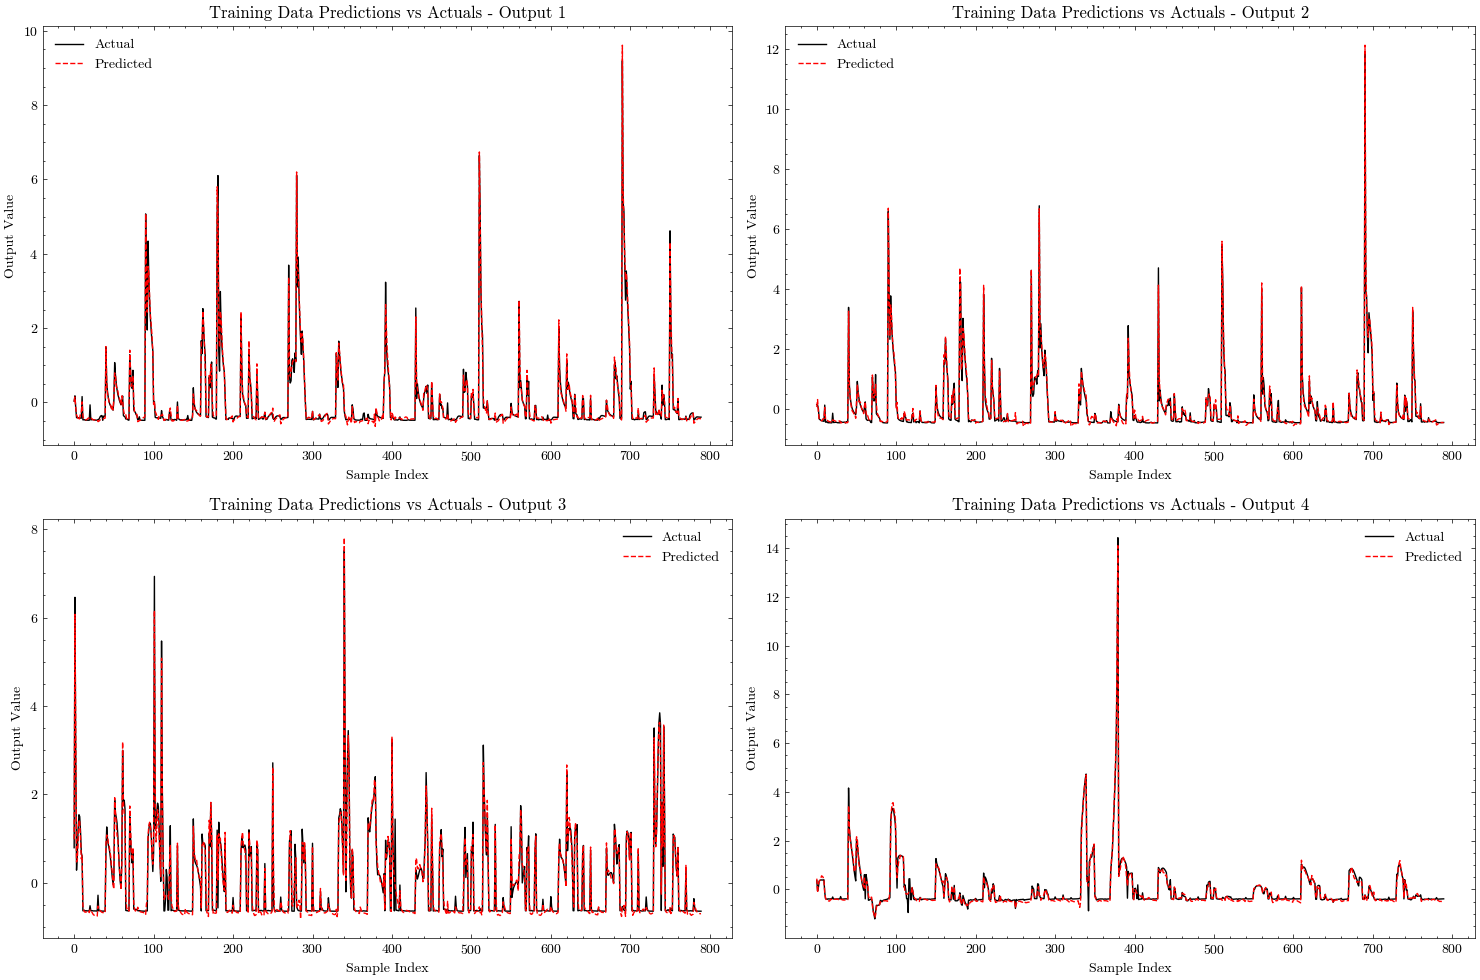

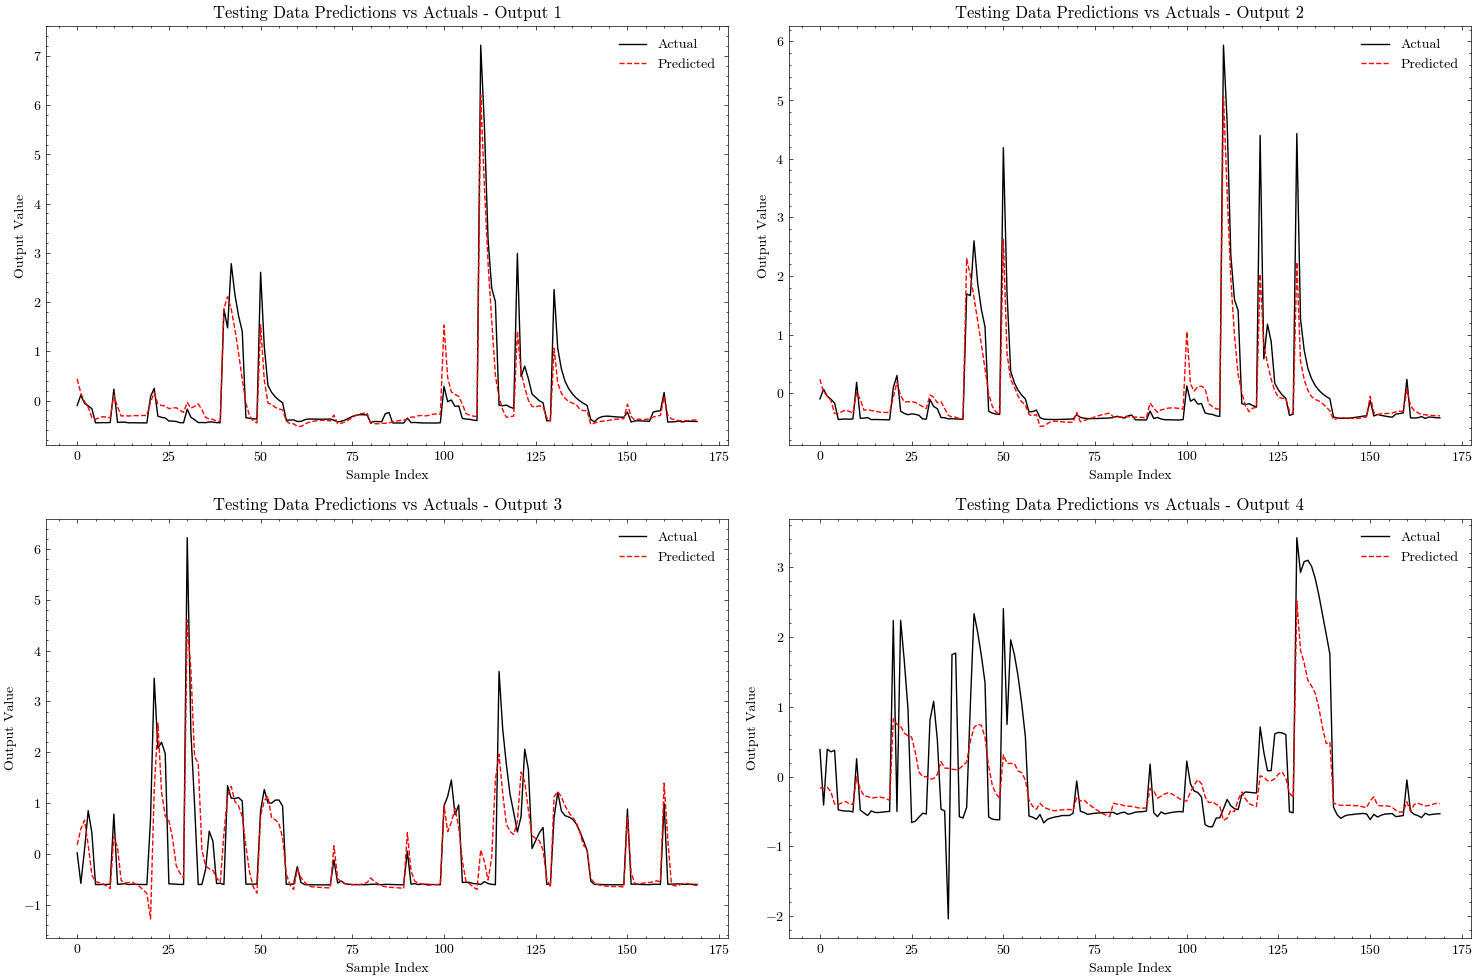

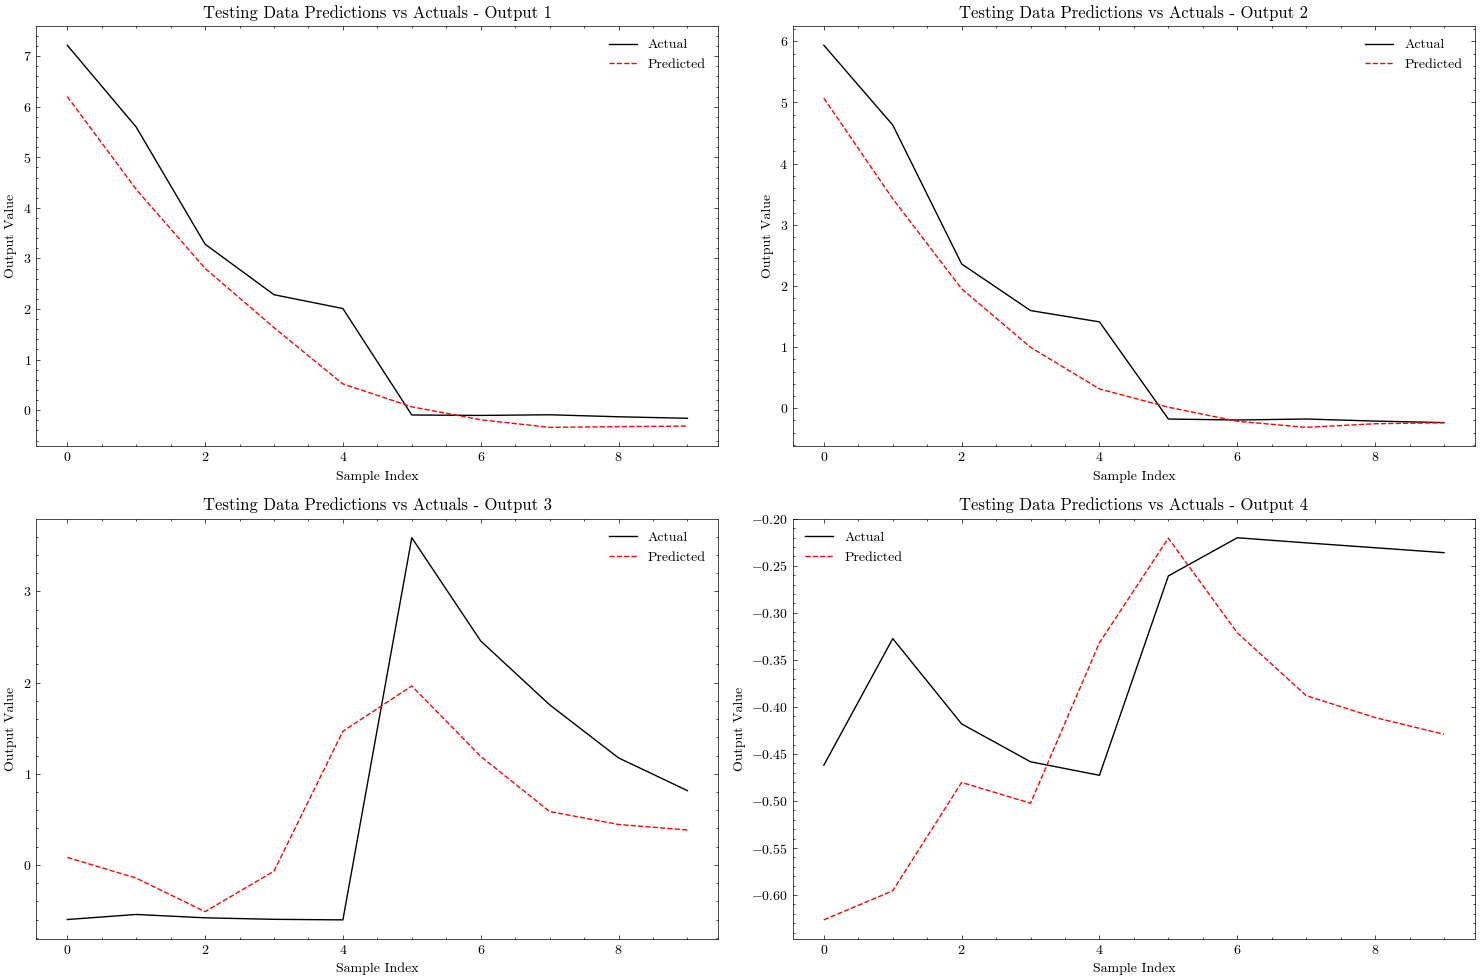

In [41]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import scienceplots
plt.style.use(['science','no-latex'])

# Function to perform predictions and calculate metrics
def evaluate_model(data_loader, model, device='cpu'):
    model.eval()  # Set the model to evaluation mode
    true_values = []
    predictions = []
    
    with torch.no_grad():  # Temporarily set all the requires_grad flags to false
        for inputs, targets in data_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            true_values.append(targets.cpu())
            predictions.append(outputs.cpu())

    true_values = torch.cat(true_values, dim=0).numpy()
    predictions = torch.cat(predictions, dim=0).numpy()
    
    r2_scores = [r2_score(true_values[:, i], predictions[:, i]) for i in range(true_values.shape[1])]
    #r2_scores = r2_score(true_values, predictions)
    
    return true_values, predictions, r2_scores

# Assuming inputs_train, outputs_train, inputs_test, outputs_test are defined and loaded
# Creating data loaders for batch processing (optional, beneficial if data is large)
from torch.utils.data import TensorDataset, DataLoader

inputs_train_scaled = torch.tensor(inputs_train_scaled, dtype=torch.float32)
outputs_train_scaled = torch.tensor(outputs_train_scaled, dtype=torch.float32)
inputs_test_scaled = torch.tensor(inputs_test_scaled, dtype=torch.float32)
outputs_test_scaled = torch.tensor(outputs_test_scaled, dtype=torch.float32)
# Convert data to datasets
train_dataset_scaled = TensorDataset(inputs_train_scaled, outputs_train_scaled)
test_dataset_scaled = TensorDataset(inputs_test_scaled, outputs_test_scaled)

# Create data loaders
train_loader = DataLoader(train_dataset_scaled, batch_size=10, shuffle=False)
test_loader = DataLoader(test_dataset_scaled, batch_size=10, shuffle=False)

# Evaluate on training data
train_actuals, train_predictions, train_r2 = evaluate_model(train_loader, model)

# Evaluate on testing data
test_actuals, test_predictions, test_r2 = evaluate_model(test_loader, model)

# Print R^2 scores
print("Training R^2 scores for each output:", train_r2)
print("Testing R^2 scores for each output:", test_r2)

# Plotting function
def plot_results(actuals, predictions, title):
    plt.figure(figsize=(15, 10))
    for i in range(actuals.shape[1]):
    #for i in [0]:
        plt.subplot(2, 2, i + 1)
        #plt.plot(actuals[:], 'b-', label='Actual')
        #plt.plot(predictions[:], 'r--', label='Predicted')
        plt.plot(actuals[:, i], 'black', label='Actual')
        plt.plot(predictions[:, i], 'r--', label='Predicted')
        plt.title(f'{title} - Output {i+1}')
        plt.xlabel('Sample Index')
        plt.ylabel('Output Value')
        plt.legend()
    plt.tight_layout()
    plt.show()

# Plot results
plot_results(train_actuals, train_predictions, "Training Data Predictions vs Actuals")
plot_results(test_actuals, test_predictions, "Testing Data Predictions vs Actuals")
plot_results(test_actuals[110:120], test_predictions[110:120], "Testing Data Predictions vs Actuals")

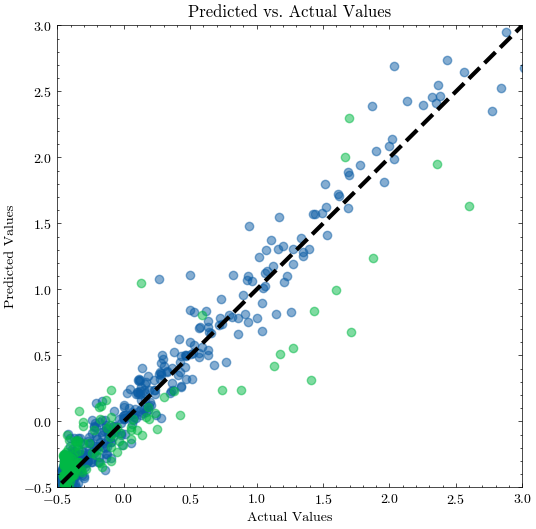

In [58]:
plt.figure(figsize=(6, 6))
plt.scatter(train_actuals[:, 1], train_predictions[:, 1], alpha=0.5)
plt.scatter(test_actuals[:, 1], test_predictions[:, 1], alpha=0.5)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.ylim(-0.5,3)
plt.xlim(-0.5,3)
plt.plot([-1, 7], [-1, 7], 'k--', lw=3)  # Diagonal line
plt.show()

In [25]:
import torch
import matplotlib.pyplot as plt

#inputs_test = torch.tensor(inputs_test.astype('float32'))
#outputs_test = torch.tensor(outputs_test.astype('float32'))

# Evaluate the model
model.eval()  # Set the model to evaluation mode

# Make predictions
with torch.no_grad():  # Temporarily set all the requires_grad flags to false
    predictions = model(inputs_test)

# Calculate the Mean Squared Error and Mean Absolute Error
mse = torch.nn.functional.mse_loss(predictions, outputs_test)
mae = torch.nn.functional.l1_loss(predictions, outputs_test)
print(f"Mean Squared Error: {mse.item()}")
print(f"Mean Absolute Error: {mae.item()}")

# Convert predictions and actuals to numpy for plotting
predicted = predictions.numpy()
actual = outputs_test.numpy()

# Plotting the first output dimension as an example
plt.figure(figsize=(10, 5))
plt.scatter(actual[:, 0], predicted[:, 0])
#plt.plot(actual[:, 0], 'b-', label='Actual')
#plt.plot(predicted[:, 0], 'r--', label='Predicted')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Output Value')
plt.legend()
plt.show()

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Dense(128, input_dim=584, activation='relu'),  # Input layer with 584 input features and ReLU activation
    Dense(64, activation='relu'),  
    Dense(4, activation='linear') 
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='mse', 
              metrics=['mae'])

# Train the model
history = model.fit(inputs_train, outputs_train,
                    epochs=100,  
                    batch_size=10,  
                    verbose=1) 

# To access the training loss values and metrics:
print(history.history)

2025-02-25 14:59:42.220757: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740488382.896031  175159 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740488383.098530  175159 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-25 14:59:45.884576: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/scratch/project_462000451/daniel/daniel_sprint/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: 

Epoch 1/100
